## Dataset annotation estraction

### Mask R-CNN training set input format overview

#### 

#### In this project each object contained into the dataset must be passed to the network as an image in grey scale (one value for each pixel) where only one instance should be present in one mask image, obviusly can be more than one mask for each image, each mask should be associated with their class.



### Supervisely mask annotations format


In [22]:
#import libraries
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import imutils
import json
import cv2
import os

In [18]:
img_1_path = 'sample_imgs/cast_def_0_102.jpeg'
img_2_path = 'sample_imgs/cast_def_0_1427.jpeg'

mask_1_path = 'sample_masks/cast_def_0_102.png'
mask_2_path = 'sample_masks/cast_def_0_1427.png'

class_to_color_json = 'obj_class_to_machine_color.json'

#### In this section we load the original image with its mask, using matplot functions to hilight different classes into the mask not visible directly from human eye, due to the fact that each class differs from others only by a few points, more specificaly we have "disk" class corespondent to pixel values (4, 4, 4), while "hole" class corresponds to (3, 3, 3).
#### So below you can see 3 images, the first is the original image, the second is the mask image as is present in the dataset and the third is the same mask augmented by matplotlib to be distinguishable.

image shape: (512, 512, 3)
mask shape: (512, 512, 3)

splitted_mask shape: (512, 512)


<Figure size 432x288 with 0 Axes>

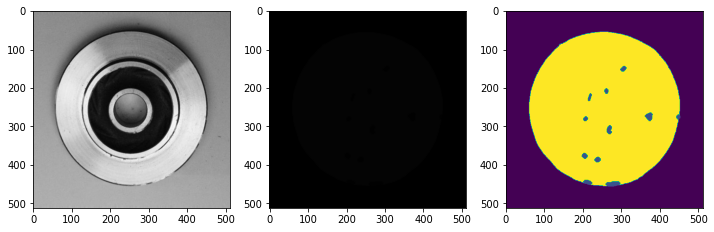

In [16]:
# loading images from their folders
img = cv2.imread(img_1_path)
mask = cv2.imread(mask_1_path)
print(f'image shape: {img.shape}')
print(f'mask shape: {mask.shape}\n')

# extracting one chanel from the mask image
# note that each channel is equal to the others
splitted_mask = cv2.split(mask)[0]
print(f'splitted_mask shape: {splitted_mask.shape}')

# plotting the images
# note that the last image is augmented by matplotlib to make classes distingushable
plt.figure()
f, window = plt.subplots(1,3,figsize=(12,4)) 
window[0].imshow(img)
window[1].imshow(mask, cmap='gray')
window[2].imshow(splitted_mask)

### In this section we extract each bitmap with their associated class

['chipping', 'deburring', 'holes', 'disk']
chipping
1
['chipping', 'deburring', 'holes', 'disk']
deburring
2
['chipping', 'deburring', 'holes', 'disk']
holes
3
['chipping', 'deburring', 'holes', 'disk']
disk
4
rows:1, cols:4


<Figure size 432x288 with 0 Axes>

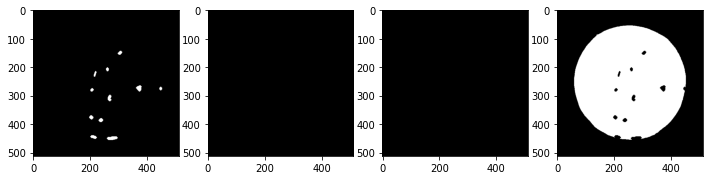

In [48]:
# if the above scripts has been runned we can proced to extract each feature
# the first step was to extract each class

with open (class_to_color_json, "r") as jsonFile:
    jsonString = jsonFile.read()

class2color = json.loads(jsonString)

class_names = [key for key in class2color.keys()]
class_mask = {}

for i in range(len(class_names)):
    #for each class
    print(class_names)
    print(class_names[i])
    print(class2color[class_names[i]][0])
    class_mask[i] = cv2.inRange(splitted_mask, class2color[class_names[i]][0], class2color[class_names[i]][0])

cols = 5 if len(class2color) >= 5 else len(class2color)
rows = int((len(class2color)/cols) + 0.5)

print(f'rows:{rows}, cols:{cols}')

plt.figure()
f, window = plt.subplots(rows, cols,figsize=(12,4)) 

for i in range(len(class_names)):
    window[i].imshow(class_mask[i], cmap='gray')




In [ ]:
#mask = cv2.split(mask)[0]
#print(mask.shape)

#new_size = (1024, 1024)
#resized_mask = cv2.resize(mask, new_size, interpolation = cv2.INTER_NEAREST)
#print(resized_mask.shape)

### Supervisely bitmap annotations format

#### 